In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sp
from scipy.special import jn_zeros
from scipy.special import gamma
from scipy.special import factorial
from scipy.optimize import fsolve
from scipy.optimize import brentq

In [78]:
def f(t,X,r):
    x = X[0]
    y = X[1]
    z = X[2]
    dx = -3*(x-y)
    dy = -x*z+r*x-y
    dz = x*y-z
    return(np.array([dx,dy,dz]))

def fourth_order_RK(t_n,x_n,f,h,r):
    k_1 = f(t_n,x_n,r)
    k_2 = f(t_n+h/2,x_n+k_1*h/2,r)
    k_3 = f(t_n+h/2,x_n+k_2*h/2,r)
    k_4 = f(t_n+h,x_n+h*k_3,r)
    return x_n + h*((k_1+k_4)/6 +(k_2+k_3)/3)

def fourth_order_RK_Adapt(t_n,x_n,f,h,r,t_f,eps,ts,xs):
    if (t_n - t_f) * np.sign(h) >= 0:
        return([t_n],[x_n])
    if (t_n + h - t_f) * np.sign(h) > 0:
        h = t_f - t_n
    
    full = fourth_order_RK(t_n,x_n,f,h,r)

    half = fourth_order_RK(t_n,x_n,f,h/2,r)
    half = fourth_order_RK(t_n+h/2,half,f,h/2,r)

    error = half-full
    error = np.inner(error, error)
    if error ==0:
        t_np1 = t_n+h
        ts, xs = fourth_order_RK_Adapt(t_np1,x_n,f,2*h,r,t_f,eps,ts,xs)
        return [t_n] + ts, [x_n] + xs
    
    if error < eps:
        fac = (eps/error)**0.25
        h_new = min(2*h,fac*h)
        t_np1 = t_n+h
        ts, xs = fourth_order_RK_Adapt(t_np1,half,f,h_new,r,t_f,eps,ts,xs)
        return [t_n] + ts, [x_n] + xs
    fac = max(0.1,(eps/error)**0.25)
    h_new = fac*h
    return fourth_order_RK_Adapt(t_n,x_n,f,h_new,r,t_f,eps,ts,xs)


eps = 0.01 # error tollerence global variable

def fourth_order_RK_Adapt_setup(t_n,x_n,f,h,r,t_f):
    ts = []
    xs =[]
    ts, xs = fourth_order_RK_Adapt(t_n,x_n,f,h,r,t_f,eps,ts,xs)
    return(np.vstack(ts),np.vstack(xs))


    


def run_solvers(x ,h,r,T_max):
    t = 0
    n = int(T_max/h)
    Ts = np.zeros((n,3))
    FORK = np.zeros((n,3))
    FORK[0:] = x
    for i in range(n):
        i+1
        FORK[i] = fourth_order_RK(t,FORK[i-1],f,h,r)
        Ts[i] = t
        t += h
    return( Ts, FORK )

def plot_axis(axis,  Ts, Xs):
    plt.plot(Ts,Xs , label=f'Lorenz 63: {axis}')
    plt.title(f"Lorenz 63:  {axis} vs time")
    plt.xlabel("time")
    plt.ylabel(axis)
    plt.show()

def plotvs(Xs,axis,i):
    plt.plot(Xs[:,i],Xs[:,i+1] , label=f'Lorenz 63: {axis[i+1]} vs {axis[i]}')
    plt.title(f"{axis[i+1]} vs {axis[i]}")
    plt.xlabel(f"{axis[i]}")
    plt.ylabel(f"{axis[i+1]}")
    plt.show()

endvalue of x: -1.3373186961819583


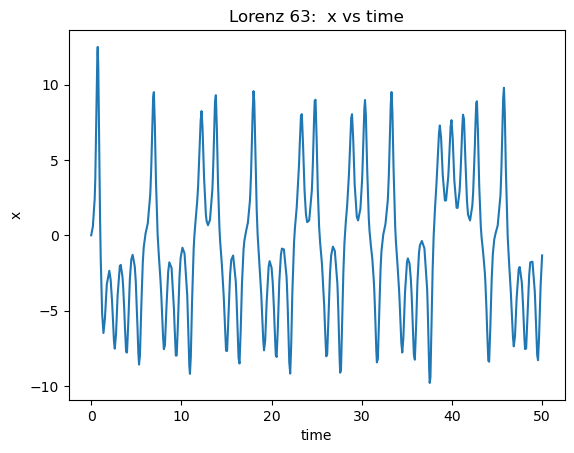

endvalue of y: 1.189060980437585


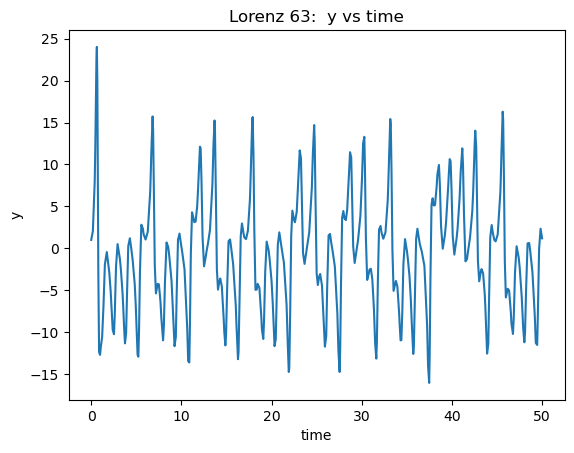

endvalue of z: 21.22472281124932


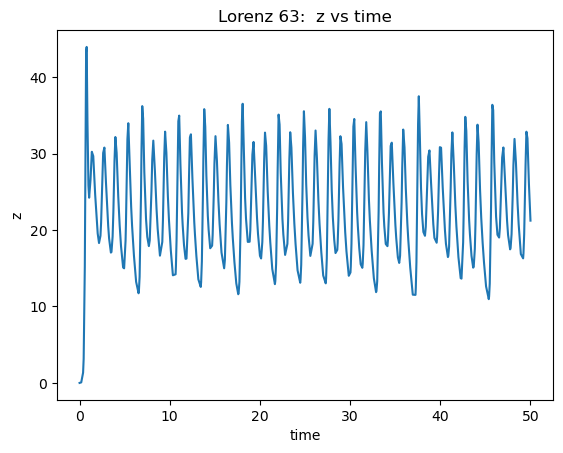

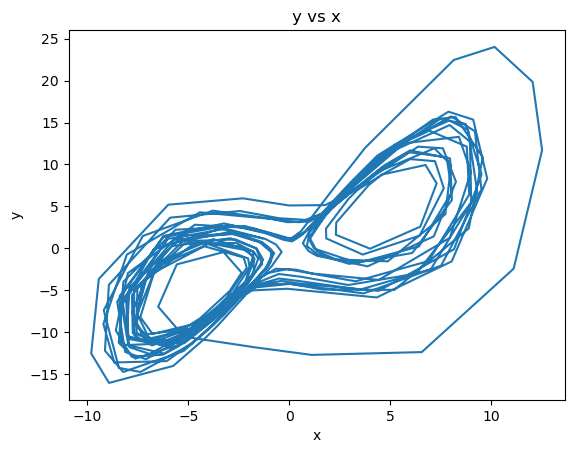

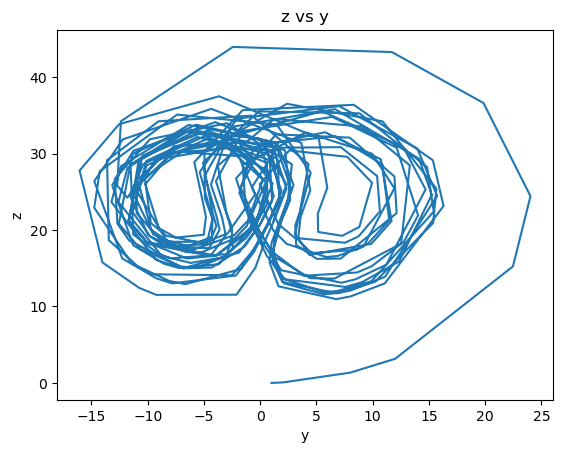

Text(0.5, 0.92, 'Lorenz 63: 3D plot')

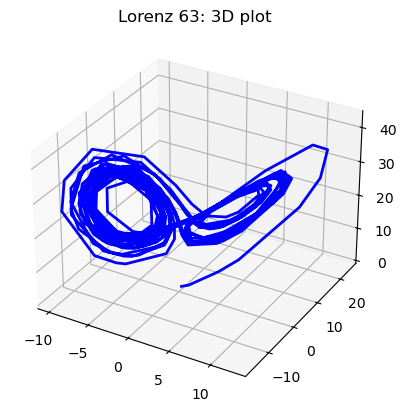

In [82]:
# ==================== Fourth Order RK Adaptive Example Part b ====================
h = 0.2
r = 26
x = np.array([0,1,0])
T_max = 50

Ts, Xs = fourth_order_RK_Adapt_setup(0,x,f,h,r,T_max)

axis =["x","y","z"]

for i in range(3):
    print(f"endvalue of {axis[i]}: {Xs[-1,i]}")
    plot_axis(axis[i], Ts, Xs[:,i])
for i in range(2):
    plotvs(Xs,axis,i)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3. Plot the 3D line
ax.plot(Xs[:,0], Xs[:,1], Xs[:,2], color='blue', linewidth=2)
plt.title(f"Lorenz 63: 3D plot")

endvalue of x: -4.720191919163856


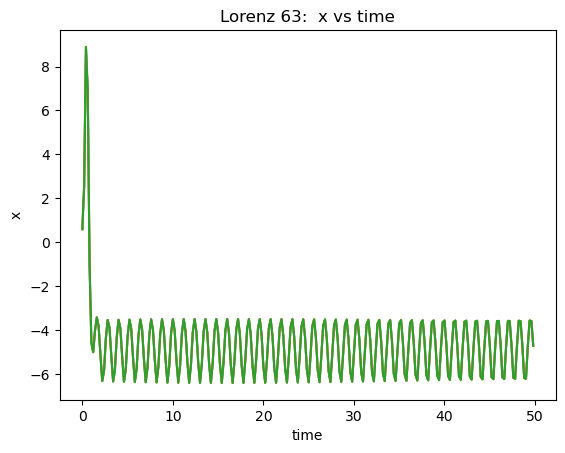

endvalue of y: -7.260181825924277


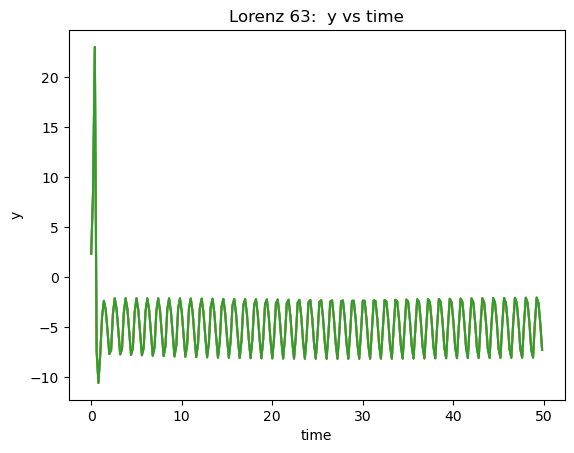

endvalue of z: 21.892584317353265


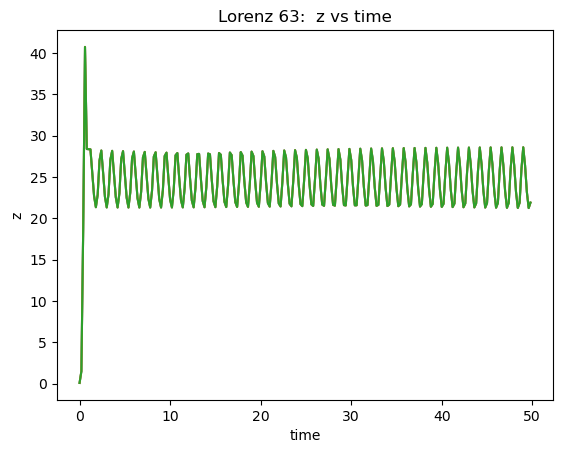

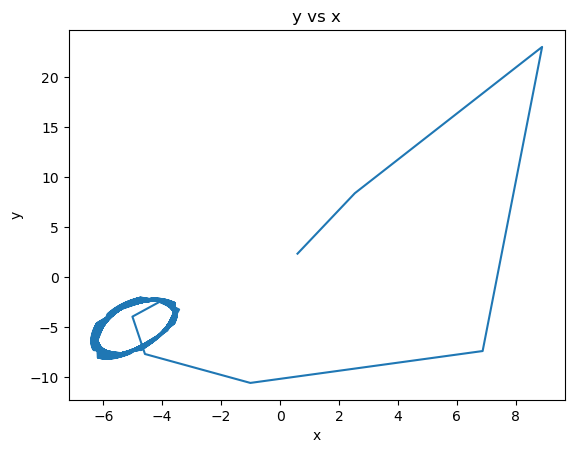

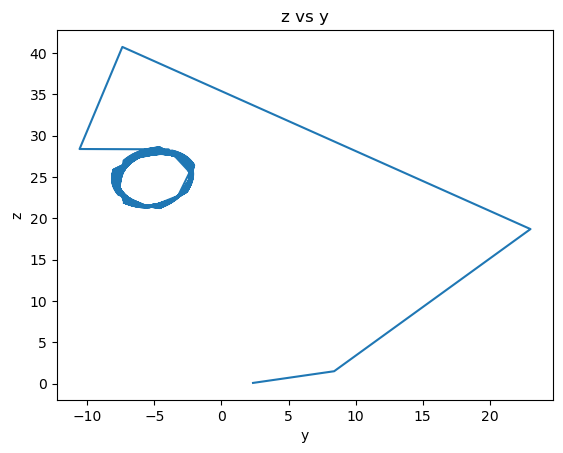

Text(0.5, 0.92, 'Lorenz 63: 3D plot')

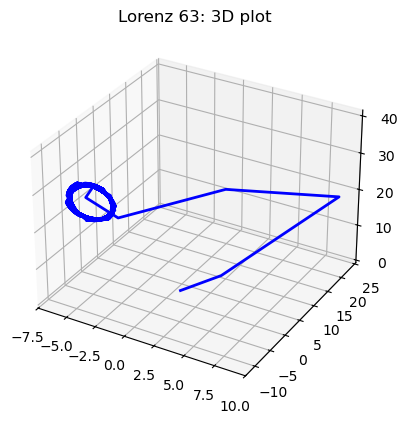

In [83]:
# ==================== Fourth Order RK Example Part a ====================
h = 0.2
r = 26
x = np.array([0,1,0])
T_max = 50

Ts, Xs = run_solvers(x,h,r,T_max)

axis =["x","y","z"]

for i in range(3):
    print(f"endvalue of {axis[i]}: {Xs[-1,i]}")
    plot_axis(axis[i], Ts, Xs[:,i])
for i in range(2):
    plotvs(Xs,axis,i)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3. Plot the 3D line
ax.plot(Xs[:,0], Xs[:,1], Xs[:,2], color='blue', linewidth=2)
plt.title(f"Lorenz 63: 3D plot")
